<a href="https://colab.research.google.com/github/florascarvalho/Postech_Data-Analytics_Tech-Challenge_Fase3/blob/main/6DTAT_Tech_Challenge_Fase_03_Grupo_44_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **6DTAT - Tech Challenge_Fase 03 - Grupo 44**
Aluna responsável: Flora Serafim de Carvalho | RM354000


# Manipulação dos dados no BigQuery


Os dados do PNAD-COVID-19 disponíveis em https://covid19.ibge.gov.br/pnad-covid/, também constam em biblioteca pública no BigQuery, e foram disponibilizados pela equipe do site  
www.basedosdados.org.

O ID dessa base no BigQuery é: [basedosdados.br_ibge_pnad_covid.microdados](https://).
Criei uma consulta no próprio Bigquery, filtrando apenas os dados e período de interesse, para assim ter ganhos em eficiência ao integrar a base com o Colab.

Abaixo, segue código desenvolvido no ambiente:


```
SELECT ano,
       mes,
       semana,
       (sigla_uf) AS uf,
       CAST(A002 AS INT64) as idade,
       (A003) AS sexo,
       CAST(A005 AS INT64) AS escolaridade,
       CAST(B0011 AS INT64) AS teve_febre,
       CAST(B0012 AS INT64) AS teve_tosse,
       CAST(B0013 AS INT64) AS teve_dor_garganta,
       CAST(B0014 AS INT64) AS teve_dificuldade_respirar,
       CAST(B0015 AS INT64) AS teve_dor_cabeca,
       CAST(B0016 AS INT64) AS teve_dor_peito,
       CAST(B0017 AS INT64) AS teve_nausea,
       CAST(B0018 AS INT64) AS teve_nariz_entupido_escorendo,
       CAST(B0019 AS INT64) AS teve_fadiga,
       CAST(B00110 AS INT64) AS teve_dor_olhos,
       CAST(B00111 AS INT64) AS teve_perda_cheiro_sabor,
       CAST(B00112 AS INT64) AS teve_dor_muscular,
       CAST(B00113 AS INT64) AS teve_diarreia,
       CAST(B002 AS INT64) AS comparecimento_estabelecimento_saude,
       CAST(B0041 AS INT64) AS postodesaude_unidadebasica_saudedafamilia,
       CAST(B0042 AS INT64) AS ps_sus_upa,
       CAST(B0043 AS INT64) AS hospital_sus,
       CAST(B0044 AS INT64) AS ambulatorio_consultorio_privado_ou_forcasarmadas,
       CAST(B0045 AS INT64) AS psprivado_forcasarmadas,
       CAST(B0046 AS INT64) AS hospitalprivado_forcasarmadas,
       CAST(B005 AS INT64) AS ficou_internado,
       CAST(B006 AS INT64) AS foi_entubado,
       CAST(B007 AS INT64) AS possui_planosaude,
       CAST(B009B AS INT64) AS resultado_swab,
       CAST(B009D AS INT64) AS resultado_sangue_furodedo,
       CAST(B009F AS INT64) AS resultado_sangue_veiabraco,
       CASE
          WHEN B009B='1' OR B009D='1'OR B009F='1' THEN '1'
          ELSE '0'
          END AS positivo_covid,
       CAST(B0101 AS INT64) AS diabetes,
       CAST(B0102 AS INT64) AS hipertensao,
       CAST(B0103 AS INT64) AS doenca_respiratoria,
       CAST(B0104 AS INT64) AS doencas_coracao,
       CAST(B0105 AS INT64) AS depressao,
       CAST(B0106 AS INT64) AS cancer,
       CASE
          WHEN B0101='1' OR B0102='1' OR B0103='1' OR B0104='1' OR B0105='1' OR B0106='1' THEN '1'
          ELSE '0'
          END AS possui_comorbidade,
       CAST(B011 AS INT64) AS medidas_restricao,
       CAST(C001 AS INT64) AS trabalhou,
       CAST(C007B AS INT64) AS clt_servidor,
       CAST(C01011 AS INT64) AS faixa_rendimento_habitual,
       CAST(C01012 AS INT64) AS rendimento_habitual,
       CAST(C011A11 AS INT64) AS faixa_rendimento_mesvigente,
       CAST(C011A12 AS INT64) AS rendimento_mesvigente,
       CAST(E001 AS INT64) AS solicitou_emprestimo,
       CAST(F002A1 AS INT64) AS possui_sabao_detergente,
       CAST(F002A2 AS INT64) AS possui_alcool,
       CAST(F002A3 AS INT64) AS possui_mascara,
       CAST(F002A4 AS INT64) AS possui_luvas,
       CAST(F002A5 AS INT64) AS possui_desinfetante_cloro
FROM `basedosdados.br_ibge_pnad_covid.microdados`
WHERE mes in(7,8,9)
ORDER BY ano, mes
```

# Integração com o BigQuery

In [1]:
!pip install google-cloud-bigquery
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'stoked-woods-443723-t9'
location = 'US'
client = bigquery.Client(project = project, location = location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

In [2]:
#Exportando para um Dataframe
job = client.get_job('bquxjob_7b84f9e7_193cc818ad4')
df = job.to_dataframe()
df

,ano,mes,semana,uf,idade,sexo,escolaridade,teve_febre,teve_tosse,teve_dor_garganta,...,faixa_rendimento_habitual,rendimento_habitual,faixa_rendimento_mesvigente,rendimento_mesvigente,solicitou_emprestimo,possui_sabao_detergente,possui_alcool,possui_mascara,possui_luvas,possui_desinfetante_cloro
0,2020,7,3,AP,30,1,4,2,2,2,...,<NA>,<NA>,<NA>,<NA>,3,1,1,1,3,1
1,2020,7,4,AP,30,2,5,2,2,2,...,<NA>,<NA>,<NA>,<NA>,3,1,1,1,2,1
2,2020,7,4,AP,26,1,4,2,2,2,...,2,500,2,500,3,1,1,1,2,1
3,2020,7,2,AP,58,2,7,2,2,2,...,<NA>,<NA>,<NA>,<NA>,3,1,1,1,1,1
4,2020,7,1,AP,38,1,5,2,2,2,...,5,1700,5,1700,3,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157979,2020,9,4,RJ,54,2,7,2,2,2,...,<NA>,<NA>,<NA>,<NA>,3,1,1,1,1,1
1157980,2020,9,3,RJ,58,1,3,2,2,2,...,<NA>,<NA>,<NA>,<NA>,3,1,1,1,2,1
1157981,2020,9,4,RJ,6,2,2,2,2,2,...,<NA>,<NA>,<NA>,<NA>,3,1,1,1,2,1
1157982,2020,9,2,SC,68,1,5,2,2,2,...,<NA>,<NA>,<NA>,<NA>,1,1,1,1,1,1


#Tratamento do Dataframe

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
import matplotlib.ticker as mticker
import seaborn as sns

df.head()

,ano,mes,semana,uf,idade,sexo,escolaridade,teve_febre,teve_tosse,teve_dor_garganta,...,faixa_rendimento_habitual,rendimento_habitual,faixa_rendimento_mesvigente,rendimento_mesvigente,solicitou_emprestimo,possui_sabao_detergente,possui_alcool,possui_mascara,possui_luvas,possui_desinfetante_cloro
0,2020,7,3,AP,30,1,4,2,2,2,...,<NA>,<NA>,<NA>,<NA>,3,1,1,1,3,1
1,2020,7,4,AP,30,2,5,2,2,2,...,<NA>,<NA>,<NA>,<NA>,3,1,1,1,2,1
2,2020,7,4,AP,26,1,4,2,2,2,...,2,500,2,500,3,1,1,1,2,1
3,2020,7,2,AP,58,2,7,2,2,2,...,<NA>,<NA>,<NA>,<NA>,3,1,1,1,1,1
4,2020,7,1,AP,38,1,5,2,2,2,...,5,1700,5,1700,3,1,1,1,1,1


In [4]:
# Como há valores <NA> que precisarei trocar por 0, preciso garantir que o zero já não esteja sendo utilizado como classificação em alguma coluna.
# No caso, há duas colunas utilizando:faixa_rendimento_habitual e faixa_rendimento_mesvigente. Por isso, abaixo alterarei o zero por 10:

df[['faixa_rendimento_habitual','faixa_rendimento_mesvigente']] = df[['faixa_rendimento_habitual','faixa_rendimento_mesvigente']].replace(0,10)

In [5]:
# Tratando o Dataframe para não haver valores <NA>
df = df.fillna(0)
df.head()

,ano,mes,semana,uf,idade,sexo,escolaridade,teve_febre,teve_tosse,teve_dor_garganta,...,faixa_rendimento_habitual,rendimento_habitual,faixa_rendimento_mesvigente,rendimento_mesvigente,solicitou_emprestimo,possui_sabao_detergente,possui_alcool,possui_mascara,possui_luvas,possui_desinfetante_cloro
0,2020,7,3,AP,30,1,4,2,2,2,...,0,0,0,0,3,1,1,1,3,1
1,2020,7,4,AP,30,2,5,2,2,2,...,0,0,0,0,3,1,1,1,2,1
2,2020,7,4,AP,26,1,4,2,2,2,...,2,500,2,500,3,1,1,1,2,1
3,2020,7,2,AP,58,2,7,2,2,2,...,0,0,0,0,3,1,1,1,1,1
4,2020,7,1,AP,38,1,5,2,2,2,...,5,1700,5,1700,3,1,1,1,1,1


# Dados médicos e caracterização dos sintomas clínicos da população

## Identificando a quantidade de internações entre os meses de Julho/20 e Setembro/20

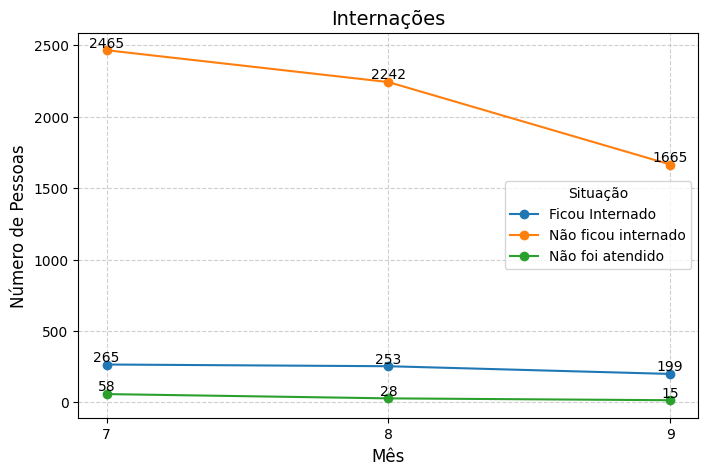

In [6]:
# Agrupando por mês as possíveis respostas da coluna "ficou internado"
internacao_por_mes = df.groupby(['mes', 'ficou_internado'])['ficou_internado'].count().reset_index(name='count')

# Plotando os dados com contagens
plt.figure(figsize=(8, 5))

# Criando o gráfico de linhas com os respectivos rótulos
for status, label, marker in [(1, 'Ficou Internado', 'o'),
                              (2, 'Não ficou internado', 'o'),
                              (3, 'Não foi atendido', 'o')]:
    data = internacao_por_mes[internacao_por_mes['ficou_internado'] == status]
    plt.plot(data['mes'], data['count'], marker=marker, label=label)

    # Adicionando rótulos de dados
    for i, valor in enumerate(data['count']):
        plt.text(data['mes'].iloc[i], valor + 2, f'{valor}', ha='center', va='bottom', fontsize=10)

# Personalizando o gráfico
plt.title('Internações', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Pessoas', fontsize=12)
plt.legend(title='Situação')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(internacao_por_mes['mes'].unique())
plt.show()


## Internações totais por Unidade Federativa ao longo dos meses de Julho/20 à Setembro/20

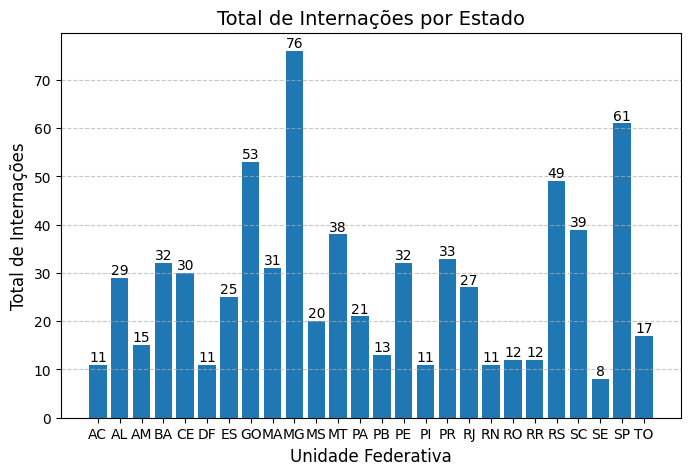

In [7]:
# Filtrar apenas os casos de internação, que são os iguais à 1
df_internados = df[df['ficou_internado'] == 1]

# Agrupar e contar por estado
dados_agrupados = df_internados.groupby('uf')['ficou_internado'].count().reset_index(name='total')

# Criado o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(dados_agrupados['uf'], dados_agrupados['total'], color='blue')


# Adicionando rótulos de dados no topo das barras
bars = plt.bar(dados_agrupados['uf'], dados_agrupados['total'])

for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, altura + 0.1,f'{int(altura)}', ha='center', va='bottom', fontsize=10)

# Personalizando o gráfico
plt.title('Total de Internações por Estado', fontsize=14)
plt.xlabel('Unidade Federativa', fontsize=12)
plt.ylabel('Total de Internações', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



## Caracterização dos sintomas clínicos

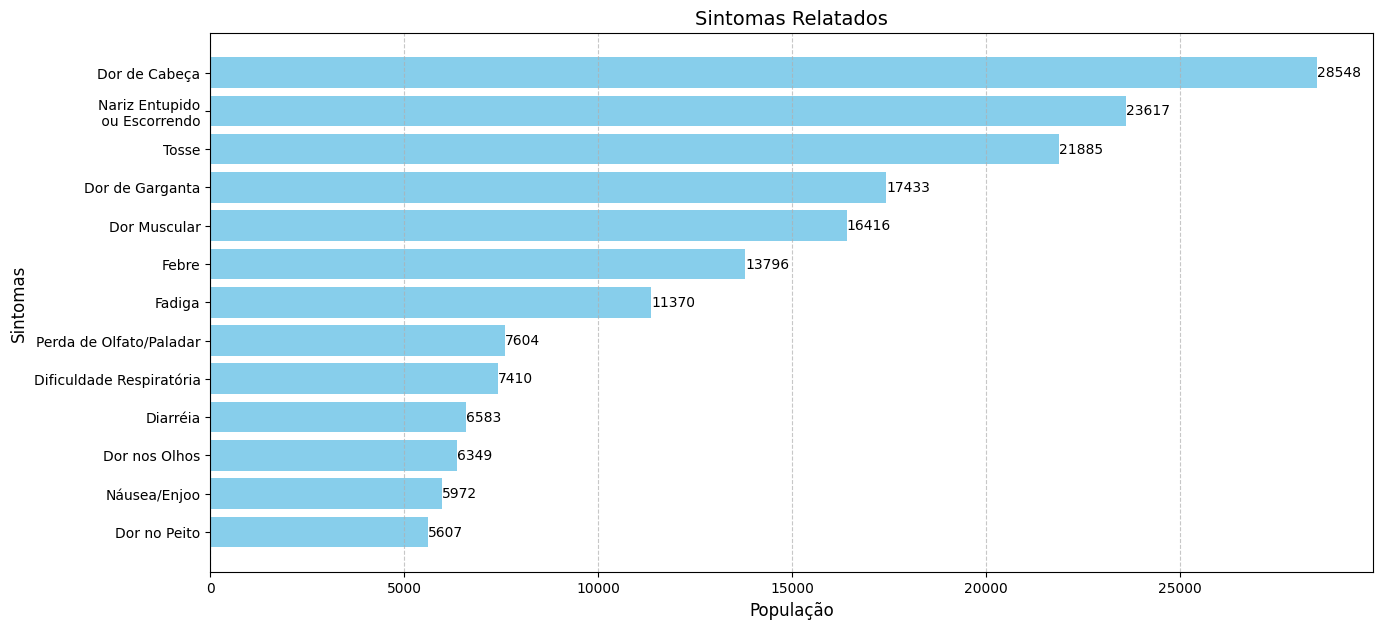

In [8]:
# Selecionando as colunas de interesse, e apenas as pessoas que responderam que apresentaram o sintoma (=1)
colunas_sintomas=df[['teve_febre','teve_tosse','teve_dor_garganta','teve_dificuldade_respirar','teve_dor_cabeca','teve_dor_peito',
'teve_nausea','teve_nariz_entupido_escorendo','teve_fadiga','teve_dor_olhos','teve_perda_cheiro_sabor','teve_dor_muscular','teve_diarreia']]

contagem_1 = (colunas_sintomas == 1).sum()

# Renomeando as colunas
contagem_1.index = ['Febre', 'Tosse', 'Dor de Garganta', 'Dificuldade Respiratória', 'Dor de Cabeça', 'Dor no Peito',
                    'Náusea/Enjoo', 'Nariz Entupido\n ou Escorrendo', 'Fadiga', 'Dor nos Olhos', 'Perda de Olfato/Paladar',
                    'Dor Muscular', 'Diarréia']

# Ordenando as barras em ordem decrescente
contagem_1 = contagem_1.sort_values(ascending=True)

# Criação do gráfico de barras ihorizontais
plt.figure(figsize=(15, 7))
plt.barh(contagem_1.index, contagem_1.values, color='skyblue')

# Adicionando rótulos de dados
for index, value in enumerate(contagem_1.values):
    plt.text(value + 0.1, index, str(value), va='center', ha='left', fontsize=10, color='black')

# Personalizando o gráfico
plt.title('Sintomas Relatados', fontsize=14)
plt.xlabel('População', fontsize=12)
plt.ylabel('Sintomas', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## Relação de entubações por número de internações

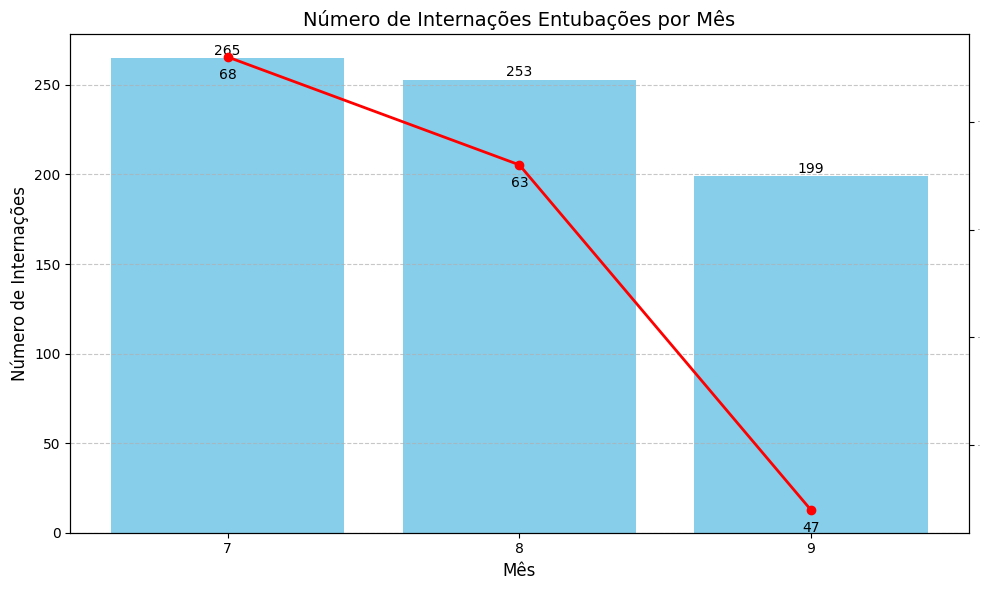

In [9]:
# Filtragem e contagem de casos de internações
internados = df[df['ficou_internado'] == 1]
contagem_internados = internados.groupby('mes')['ficou_internado'].count()

# Filtragem e contagem dos casos de entubações
entubados = df[df['foi_entubado'] == 1]
contagem_entubados = entubados.groupby('mes')['foi_entubado'].count()

# Agrupamento do gráfico de barras e linha
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras (internações)
bars = ax1.bar(contagem_internados.index, contagem_internados.values, color='skyblue')

# Adicionando rótulos de dados no gráfico de barras
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, str(yval), ha='center', va='bottom', fontsize=10)

# Personalizando o gráfico de barras
ax1.set_title('Número de Internações Entubações por Mês', fontsize=14)
ax1.set_xlabel('Mês', fontsize=12)
ax1.set_ylabel('Número de Internações', fontsize=12)
ax1.set_xticks(range(min(contagem_internados.index), max(contagem_internados.index)+1))
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Criando o gráfico de linha (entubação) no mesmo gráfico
ax2 = ax1.twinx()
ax2.plot(contagem_entubados.index, contagem_entubados.values, marker='o', color='red', linestyle='-', linewidth=2)

# Adicionando rótulos de dados para o gráfico de linha
for i, value in enumerate(contagem_entubados.values):
    ax2.text(contagem_entubados.index[i], value + -0.5, str(value), ha='center', va='top', fontsize=10, color='black')

# Removendo o rótulo do eixo y da linha
ax2.set_ylabel('')
ax2.tick_params(axis='y', labelsize=0)

# Plotagem do gráfico
plt.tight_layout()
plt.show()


## Prevalência das comorbidades

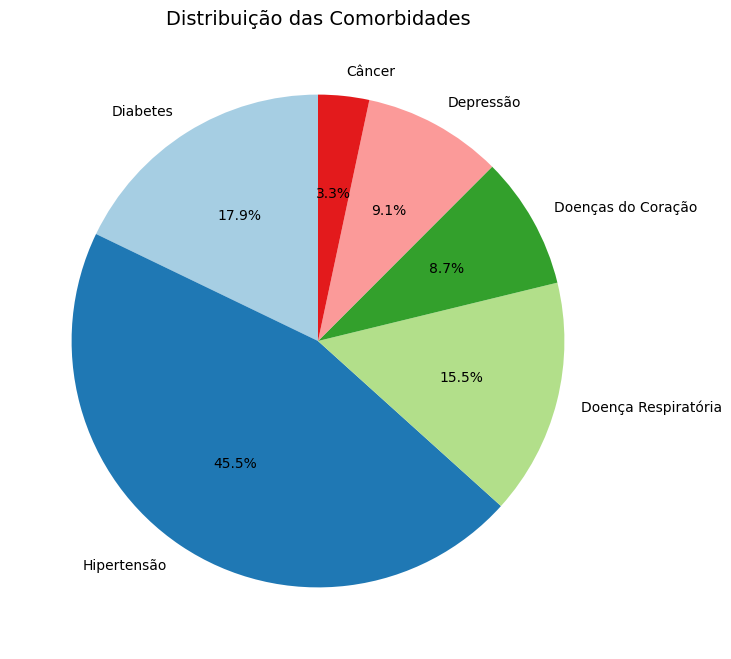

In [10]:
# Seleção das colunas que trazem informações de comorbidade
colunas_comorbidades = ['diabetes', 'hipertensao', 'doenca_respiratoria', 'doencas_coracao', 'depressao', 'cancer']

# Renomeando as colunas
novos_rótulos = {'diabetes': 'Diabetes','hipertensao': 'Hipertensão','doenca_respiratoria': 'Doença Respiratória','doencas_coracao': 'Doenças do Coração','depressao': 'Depressão','cancer': 'Câncer'}

# Filtragem dos dados em que há a presença da comorbidade
contagem_comorbidades = (df[colunas_comorbidades] == 1).sum()
contagem_comorbidades.index = [novos_rótulos[col] for col in contagem_comorbidades.index]

# Formatação do gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_comorbidades, labels=contagem_comorbidades.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição das Comorbidades', fontsize=14)

# Plotagem do gráfico
plt.show()


## Plano de Saúde

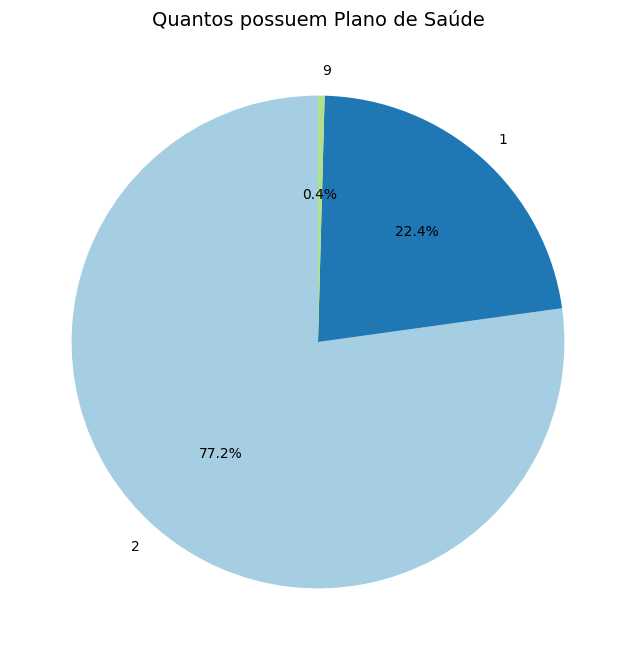

In [11]:
# Contar a quantidade de ocorrências de cada categoria
contagem_planosaude = df['possui_planosaude'].value_counts()

# Configuração do gráfico de pizza
plt.figure(figsize=(8, 8))

plt.pie(contagem_planosaude, labels=contagem_planosaude.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Quantos possuem Plano de Saúde', fontsize=14)
plt.show()



## Unidade de internação

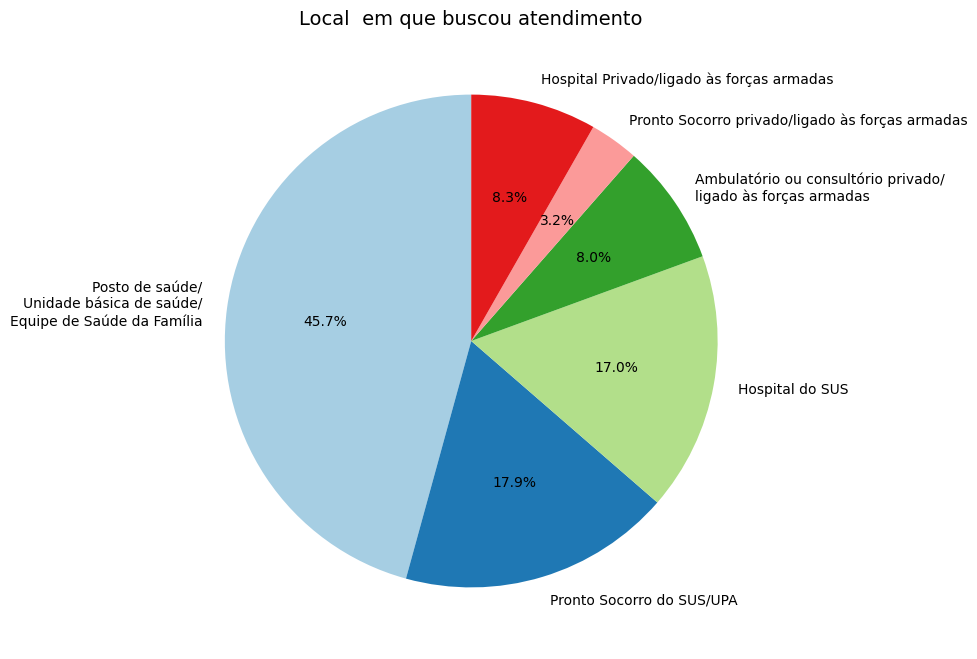

In [12]:
# Seleção das colunas que trazem informações de posto de atendimento
colunas_estabelecimento = ['postodesaude_unidadebasica_saudedafamilia', 'ps_sus_upa', 'hospital_sus',
                           'ambulatorio_consultorio_privado_ou_forcasarmadas', 'psprivado_forcasarmadas', 'hospitalprivado_forcasarmadas']

# Renomeando as colunas
renomear_estabelecimento = {'postodesaude_unidadebasica_saudedafamilia':'Posto de saúde/\nUnidade básica de saúde/\nEquipe de Saúde da Família',
                            'ps_sus_upa':'Pronto Socorro do SUS/UPA', 'hospital_sus': 'Hospital do SUS',
                            'ambulatorio_consultorio_privado_ou_forcasarmadas':'Ambulatório ou consultório privado/\nligado às forças armadas',
                            'psprivado_forcasarmadas':'Pronto Socorro privado/ligado às forças armadas',
                            'hospitalprivado_forcasarmadas':'Hospital Privado/ligado às forças armadas'}

# Filtragem dos dados em que houve atendimento
contagem_estabelecimento = (df[colunas_estabelecimento] == 1).sum()
contagem_estabelecimento.index = [renomear_estabelecimento[col] for col in contagem_estabelecimento.index]

# Formatação do gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_estabelecimento, labels=contagem_estabelecimento.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Local  em que buscou atendimento', fontsize=14)

# Plotagem do gráfico
plt.show()



## Casos positivos e com comorbidade

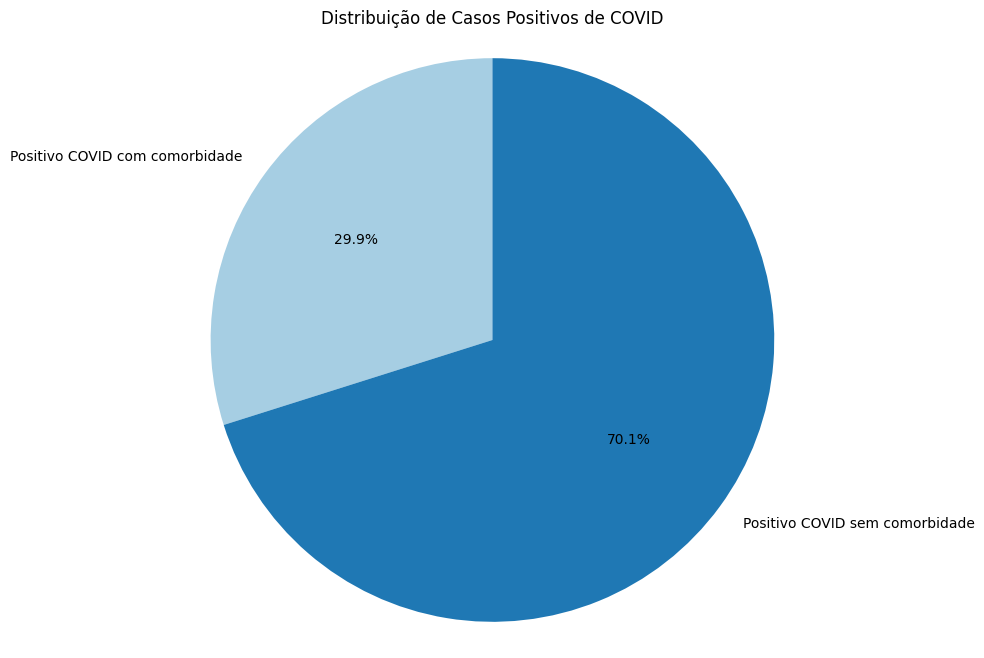

In [13]:
# Filtragem dos casos com comorbidade e sem comorbidade
casos_com_comorbidade = df[(df['positivo_covid'] == '1') & (df['possui_comorbidade'] == '1')].shape[0]
casos_sem_comorbidade = df[(df['positivo_covid'] == '1') & (df['possui_comorbidade'] == '0')].shape[0]

# Dados para o gráfico de pizza
labels = ['Positivo COVID com comorbidade', 'Positivo COVID sem comorbidade']
values = [casos_com_comorbidade, casos_sem_comorbidade]

# Criação do gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Casos Positivos de COVID')
plt.axis('equal')
plt.show()


# Comportamentos da Sociedade

## Medidas de restrição

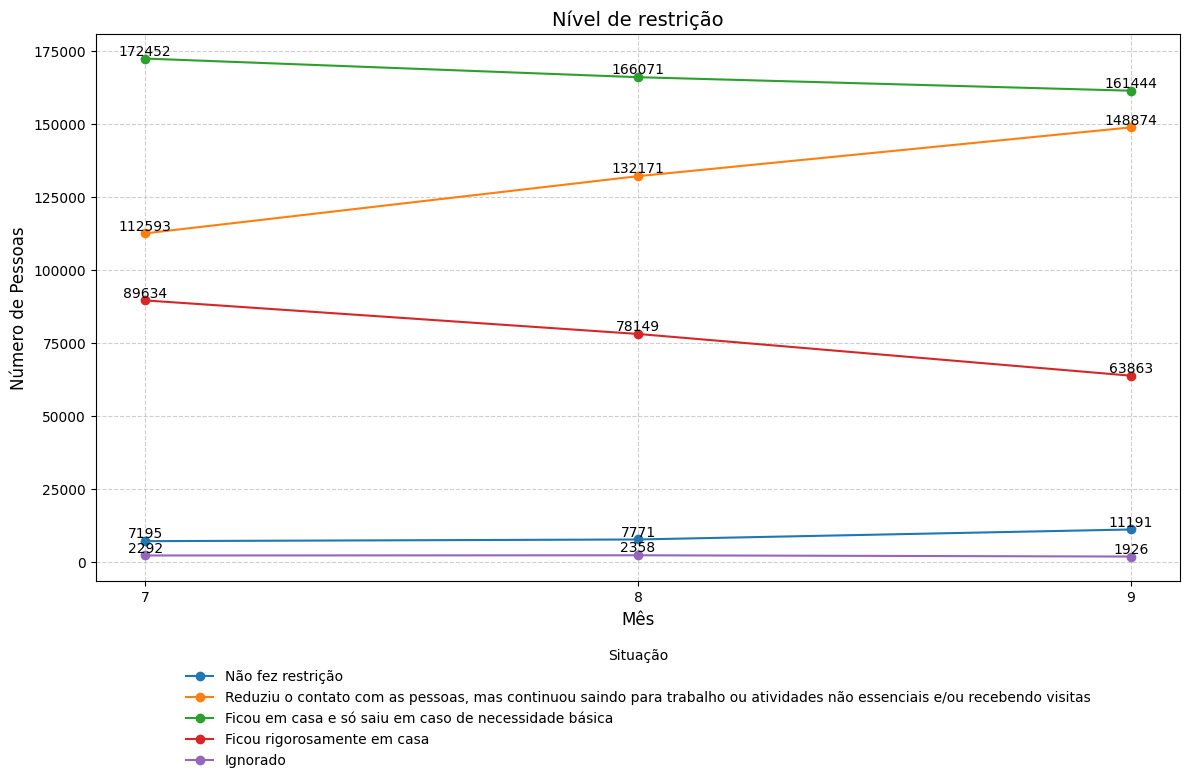

In [14]:
# Agrupando por mês as respostas em relação à restrição
restricao_por_mes = df.groupby(['mes', 'medidas_restricao'])['medidas_restricao'].count().reset_index(name='count')

# Plotando os dados com contagens
plt.figure(figsize=(12, 8))

# Criando o gráfico de linhas com os respectivos rótulos
for status, label, marker in [
    (1, 'Não fez restrição', 'o'),
    (2, 'Reduziu o contato com as pessoas, mas continuou saindo para trabalho ou atividades não essenciais e/ou recebendo visitas', 'o'),
    (3, 'Ficou em casa e só saiu em caso de necessidade básica', 'o'),
    (4, 'Ficou rigorosamente em casa', 'o'),
    (9, 'Ignorado', 'o')]:

    data = restricao_por_mes[restricao_por_mes['medidas_restricao'] == status]
    plt.plot(data['mes'], data['count'], marker=marker, label=label)

    # Adicionando rótulos de dados
    for i, valor in enumerate(data['count']):
        plt.text(data['mes'].iloc[i], valor + 2, f'{valor}', ha='center', va='bottom', fontsize=10)

# Personalizando o gráfico
plt.title('Nível de restrição', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Pessoas', fontsize=12)

# Alterando a posição da legenda
plt.legend(title='Situação', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=1, frameon=False)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(restricao_por_mes['mes'].unique())
plt.tight_layout()
plt.show()






## Itens de higiene

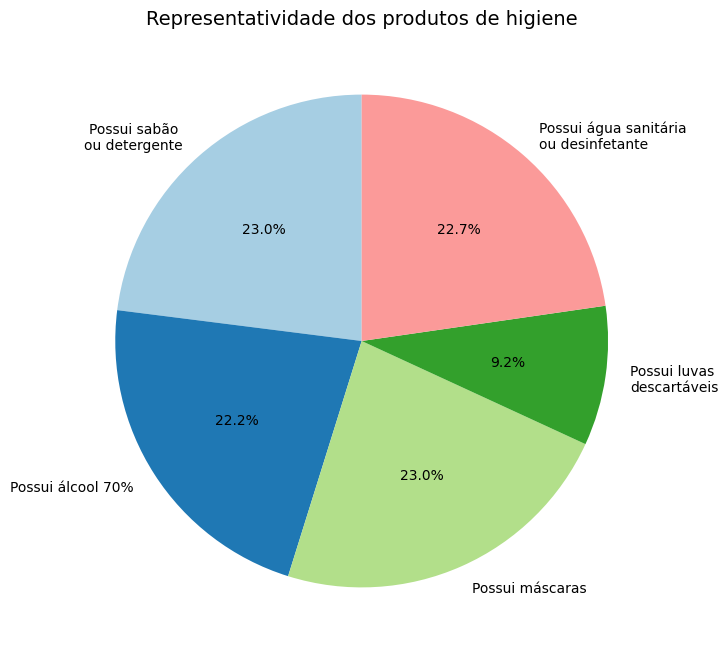

In [15]:
# Seleção das colunas que trazem informações de posto de atendimento
colunas_produtos= ['possui_sabao_detergente',  'possui_alcool', 'possui_mascara', 'possui_luvas', 'possui_desinfetante_cloro']

# Renomeando as colunas
renomear_produtos = {'possui_sabao_detergente':'Possui sabão \nou detergente',  'possui_alcool':'Possui álcool 70%', 'possui_mascara':'Possui máscaras',
                     'possui_luvas':'Possui luvas \ndescartáveis', 'possui_desinfetante_cloro':'Possui água sanitária \nou desinfetante'}

# Filtragem dos dados em que houve atendimento
contagem_produtos = (df[colunas_produtos] == 1).sum()
contagem_produtos.index = [renomear_produtos[col] for col in contagem_produtos.index]

# Formatação do gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_produtos, labels=contagem_produtos.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Representatividade dos produtos de higiene', fontsize=14)

# Plotagem do gráfico
plt.show()



## Relação entre medidas de restrição e internações

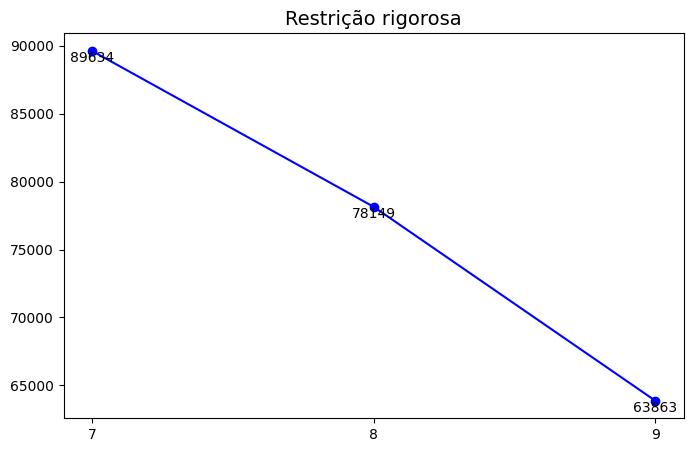

In [16]:
# Filtrando os valores iguais a 4 na coluna 'medidas_restricao'
restricoes_4 = df[df['medidas_restricao'] == 4]

# Contando os valores por mês
contagem_por_mes = restricoes_4.groupby('mes').size().reindex(df['mes'].unique(), fill_value=0)

# Criando o gráfico de linhas
plt.figure(figsize=(8, 5))
plt.plot(contagem_por_mes.index, contagem_por_mes.values, marker='o', linestyle='-', color='b')

# Adicionando rótulos de dados nos pontos
for i, valor in enumerate(contagem_por_mes.values):
    plt.text(contagem_por_mes.index[i], valor + 0.1, str(valor), ha='center', va='top', fontsize=10)

# Adicionando rótulos e título
plt.title('Restrição rigorosa', fontsize=14)
plt.xticks(restricao_por_mes['mes'].unique())


# Exibindo o gráfico
plt.show()

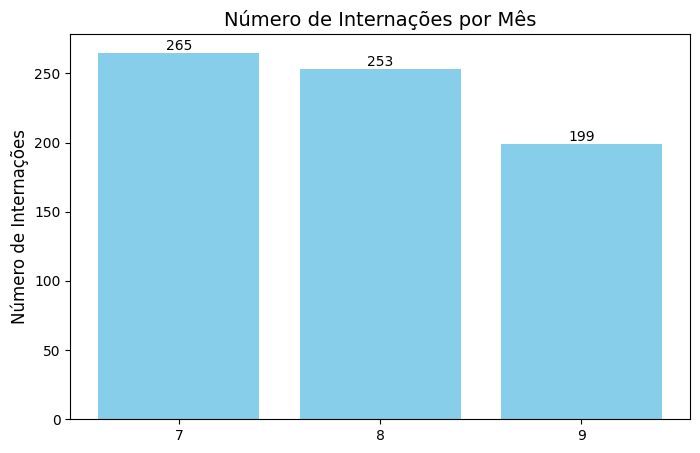

In [17]:
# Filtrando os valores iguais a 1 na coluna 'ficou_internado'
internados = df[df['ficou_internado'] == 1]

# Contando o número de internações por mês
contagem_internados = internados.groupby('mes')['ficou_internado'].count()

# Criando o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(contagem_internados.index, contagem_internados.values, color='skyblue')

# Adicionando rótulos de dados nas barras
for i, valor in enumerate(contagem_internados.values):
    plt.text(contagem_internados.index[i], valor + 0.1, str(valor), ha='center', va='bottom', fontsize=10)

# Adicionando título e rótulos aos eixos
plt.title('Número de Internações por Mês', fontsize=14)
plt.xticks(restricao_por_mes['mes'].unique())
plt.ylabel('Número de Internações', fontsize=12)

# Exibindo o gráfico
plt.show()

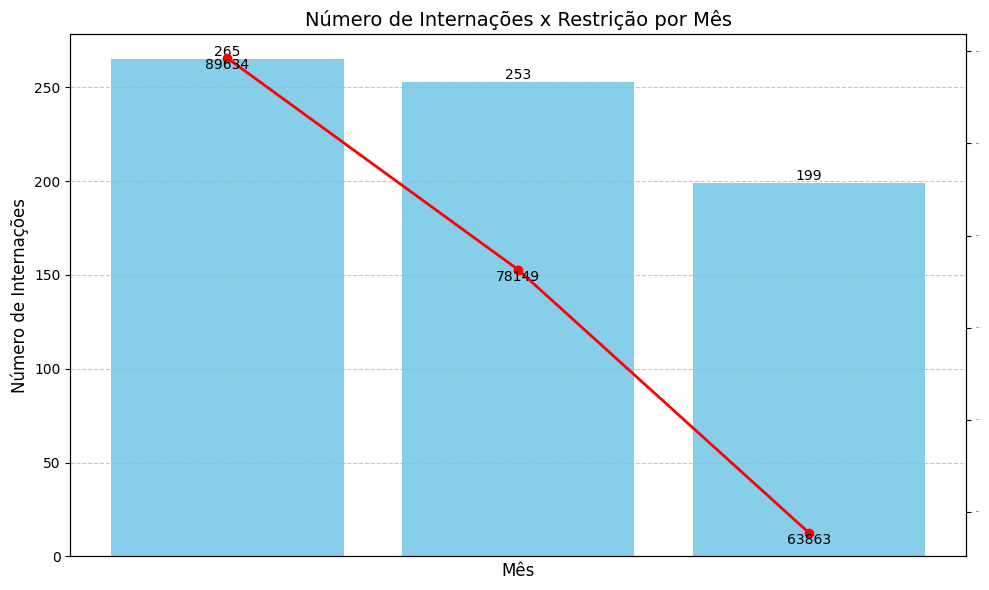

In [18]:
# Filtrando os valores iguais a 1 na coluna 'ficou_internado'
internados = df[df['ficou_internado'] == 1]

# Contando o número de internações por mês
contagem_internados = internados.groupby('mes')['ficou_internado'].count()

# Filtrando os valores iguais a 4 na coluna 'medidas_restricao'
restricoes_4 = df[df['medidas_restricao'] == 4]

# Contando os valores por mês para a restrição rigorosa
contagem_por_mes = restricoes_4.groupby('mes').size().reindex(df['mes'].unique(), fill_value=0)

# Criando o gráfico de barras e linhas no mesmo gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras (internações)
bars = ax1.bar(contagem_internados.index, contagem_internados.values, color='skyblue', label='Internações')

# Adicionando rótulos de dados nas barras
for i, valor in enumerate(contagem_internados.values):
    ax1.text(contagem_internados.index[i], valor + 0.1, str(valor), ha='center', va='bottom', fontsize=10)

# Configurando o eixo primário (barras)
ax1.set_xlabel('Mês', fontsize=12)
ax1.set_ylabel('Número de Internações', fontsize=12)
ax1.set_title('Número de Internações x Restrição por Mês', fontsize=14)
ax1.set_xticks(range(len(contagem_internados.index)))
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Criando o gráfico de linhas (restrição rigorosa) no eixo secundário
ax2 = ax1.twinx()
ax2.plot(contagem_por_mes.index, contagem_por_mes.values, marker='o', color='red', linestyle='-', linewidth=2)

# Adicionando rótulos de dados para o gráfico de linha
for i, valor in enumerate(contagem_por_mes.values):
    ax2.text(contagem_por_mes.index[i], valor + 0.1, str(valor), ha='center', va='top', fontsize=10)

# Removendo o rótulo do eixo y da linha
ax2.set_ylabel('')
ax2.tick_params(axis='y', labelsize=0)

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()


# Características econômicas da Sociedade

## Escolaridade

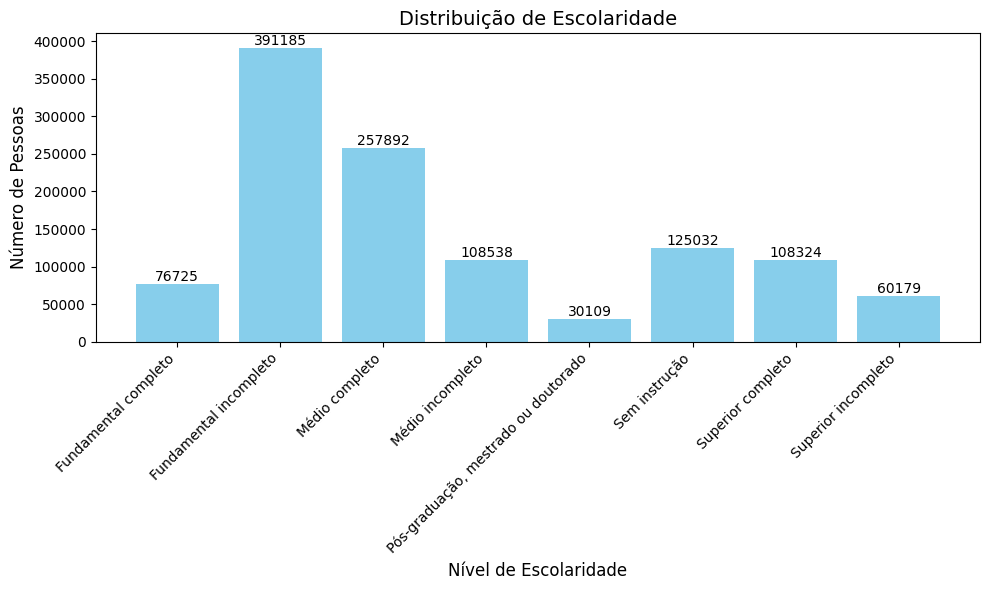

In [19]:
# Classificando o nível de escolaridade
mapa_escolaridade = { 1: 'Sem instrução',
    2: 'Fundamental incompleto',
    3: 'Fundamental completo',
    4: 'Médio incompleto',
    5: 'Médio completo',
    6: 'Superior incompleto',
    7: 'Superior completo',
    8: 'Pós-graduação, mestrado ou doutorado'}

# Substituindo os números pelos rótulos
df['escolaridade_label'] = df['escolaridade'].map(mapa_escolaridade)

# Contando o número de ocorrências de cada cluster de escolaridade
contagem_escolaridade = df['escolaridade_label'].value_counts().sort_index()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_escolaridade.index, contagem_escolaridade.values, color='skyblue')

# Adicionando rótulos de dados nas barras
for i, valor in enumerate(contagem_escolaridade.values):
    plt.text(i, valor + 0.1, str(valor), ha='center', va='bottom', fontsize=10)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição de Escolaridade', fontsize=14)
plt.xlabel('Nível de Escolaridade', fontsize=12)
plt.ylabel('Número de Pessoas', fontsize=12)

# Exibindo o gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Comparativo de Faixa salários

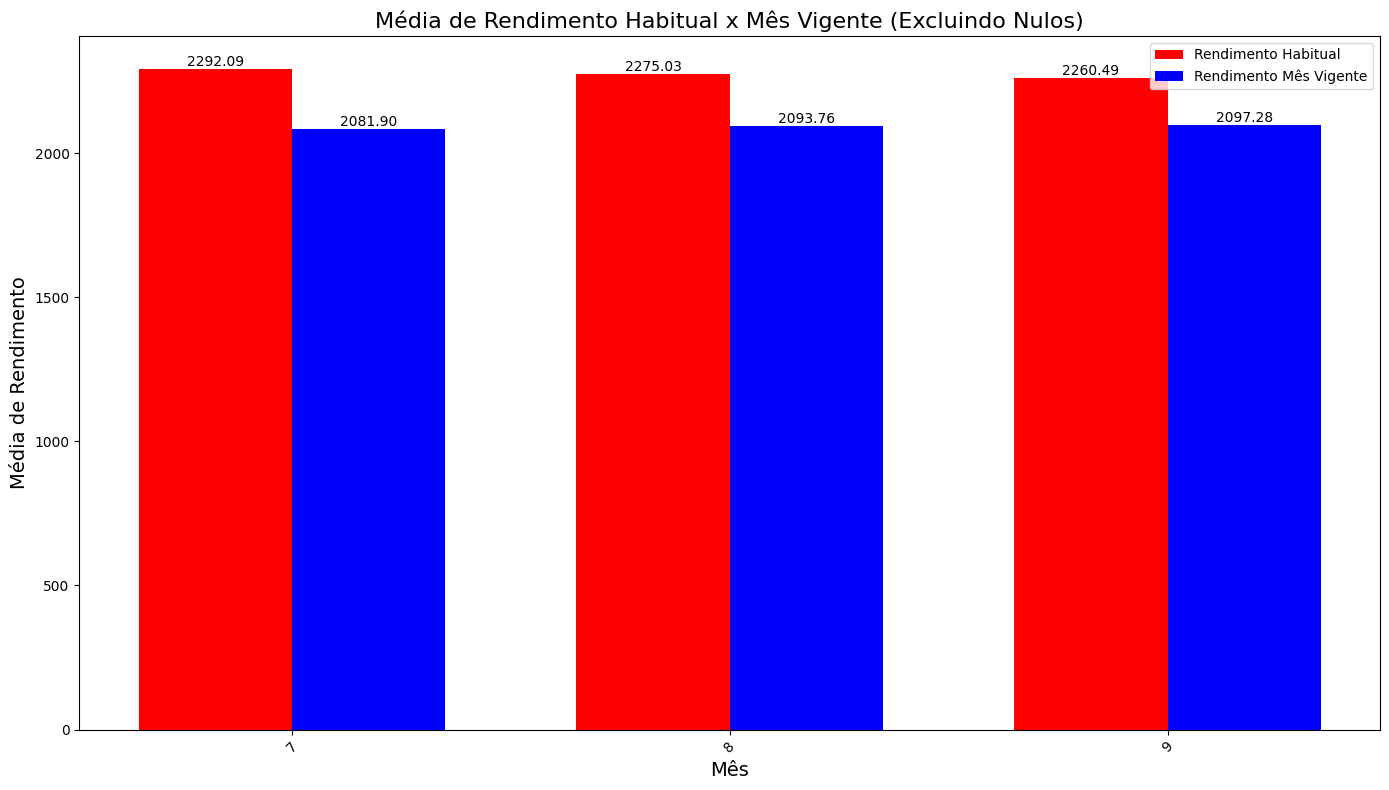

In [20]:
#Filtrando para excluir os valores iguais a zero
df_filtered = df[(df['rendimento_habitual'] > 0) & (df['rendimento_mesvigente'] > 0)]

# Calculando a média mensal das colunas
medias = df_filtered.groupby('mes')[['rendimento_habitual', 'rendimento_mesvigente']].mean()

# Configurando o gráfico
fig, ax = plt.subplots(figsize=(14, 8))
x = medias.index
bar_width = 0.35

# Barras para rendimento_habitual
bars_habitual = ax.bar(
    x - bar_width / 2,
    medias['rendimento_habitual'],
    bar_width,
    label='Rendimento Habitual',
    color='red'
)

# Barras para rendimento_mesvigente
bars_mesvigente = ax.bar(
    x + bar_width / 2,
    medias['rendimento_mesvigente'],
    bar_width,
    label='Rendimento Mês Vigente',
    color='blue'
)

# Adicionando rótulos de dados
for bar in bars_habitual:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

for bar in bars_mesvigente:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Adicionando título e rótulos
ax.set_title('Média de Rendimento Habitual x Mês Vigente (Excluindo Nulos)', fontsize=16)
ax.set_xlabel('Mês', fontsize=14)
ax.set_ylabel('Média de Rendimento', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels([str(m) for m in x], rotation=45)
ax.legend()

# Ajustando layout
plt.tight_layout()
plt.show()




## Trabalho no período

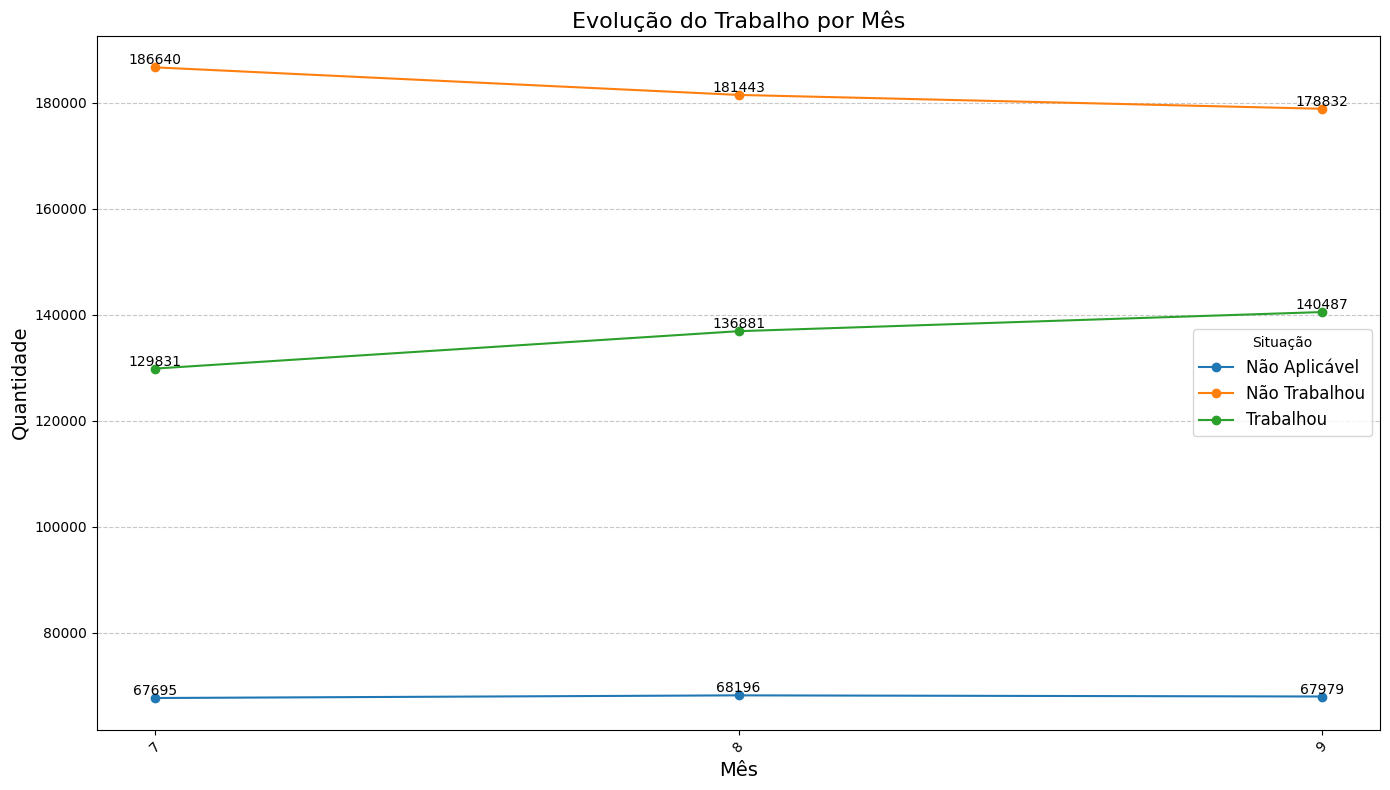

In [21]:
# Garantindo que a coluna 'trabalhou' seja categorizada corretamente
df['categoria_trabalhou'] = df['trabalhou'].map({
    1: 'Trabalhou',
    2: 'Não Trabalhou'
}).fillna('Não Aplicável')

# Contando as ocorrências de cada categoria por mês
contagem_trabalhou = df.groupby(['mes', 'categoria_trabalhou']).size().unstack(fill_value=0)

# Criando o gráfico
fig, ax = plt.subplots(figsize=(14, 8))

for categoria in contagem_trabalhou.columns:
    valores = contagem_trabalhou[categoria]
    ax.plot(contagem_trabalhou.index, valores,  label=categoria, marker='o')

    # Adicionando rótulos de dados
    for x, y in zip(contagem_trabalhou.index, valores):
        ax.text(x, y + 0.5, str(y), ha='center', va='bottom', fontsize=10)

# Adicionando título e rótulos
ax.set_title('Evolução do Trabalho por Mês', fontsize=16)
ax.set_xlabel('Mês', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
ax.legend(title='Situação', fontsize=12)

# Ajustando o layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(contagem_trabalhou.index, rotation=45)
plt.tight_layout()
plt.show()

## CLTs e servidores públicos com carteira de trabalho assinada

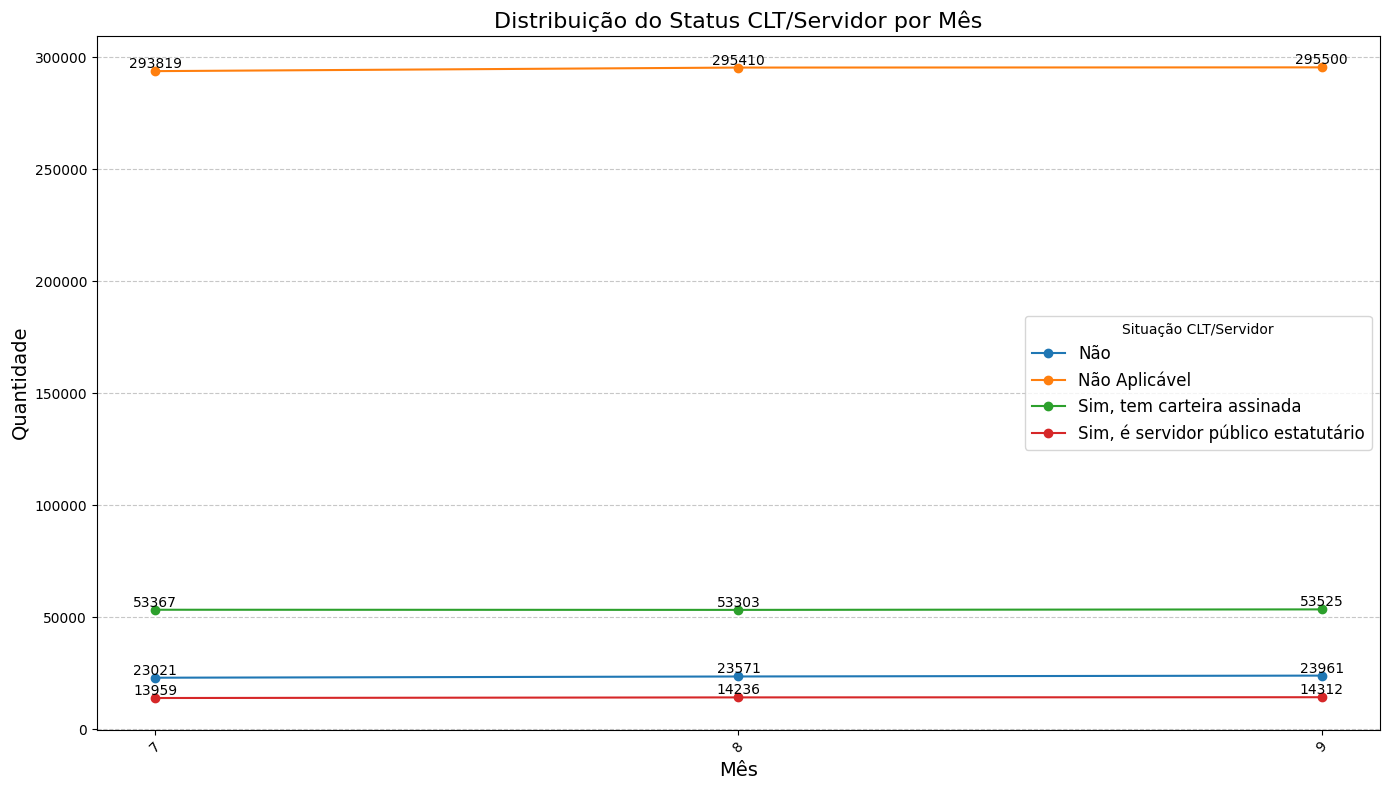

In [22]:
# Mapeando a coluna 'clt_servidor' para categorias legíveis
df['categoria_clt_servidor'] = df['clt_servidor'].map({
    1: 'Sim, tem carteira assinada',
    2: 'Sim, é servidor público estatutário',
    3: 'Não'
}).fillna('Não Aplicável')

# Contando as ocorrências de cada categoria por mês
contagem_clt_servidor = df.groupby(['mes', 'categoria_clt_servidor']).size().unstack(fill_value=0)

# Criando o gráfico
fig, ax = plt.subplots(figsize=(14, 8))

for categoria in contagem_clt_servidor.columns:
    valores = contagem_clt_servidor[categoria]
    ax.plot( contagem_clt_servidor.index, valores, label=categoria, marker='o')
    # Adicionando rótulos de dados
    for x, y in zip(contagem_clt_servidor.index, valores):
        ax.text(x, y + 0.5, str(y), ha='center', va='bottom', fontsize=10)

# Adicionando título e rótulos
ax.set_title('Distribuição do Status CLT/Servidor por Mês', fontsize=16)
ax.set_xlabel('Mês', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
ax.legend(title='Situação CLT/Servidor', fontsize=12)

# Ajustando o layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(contagem_clt_servidor.index, rotation=45)
plt.tight_layout()
plt.show()


## Solicitação de empréstimo

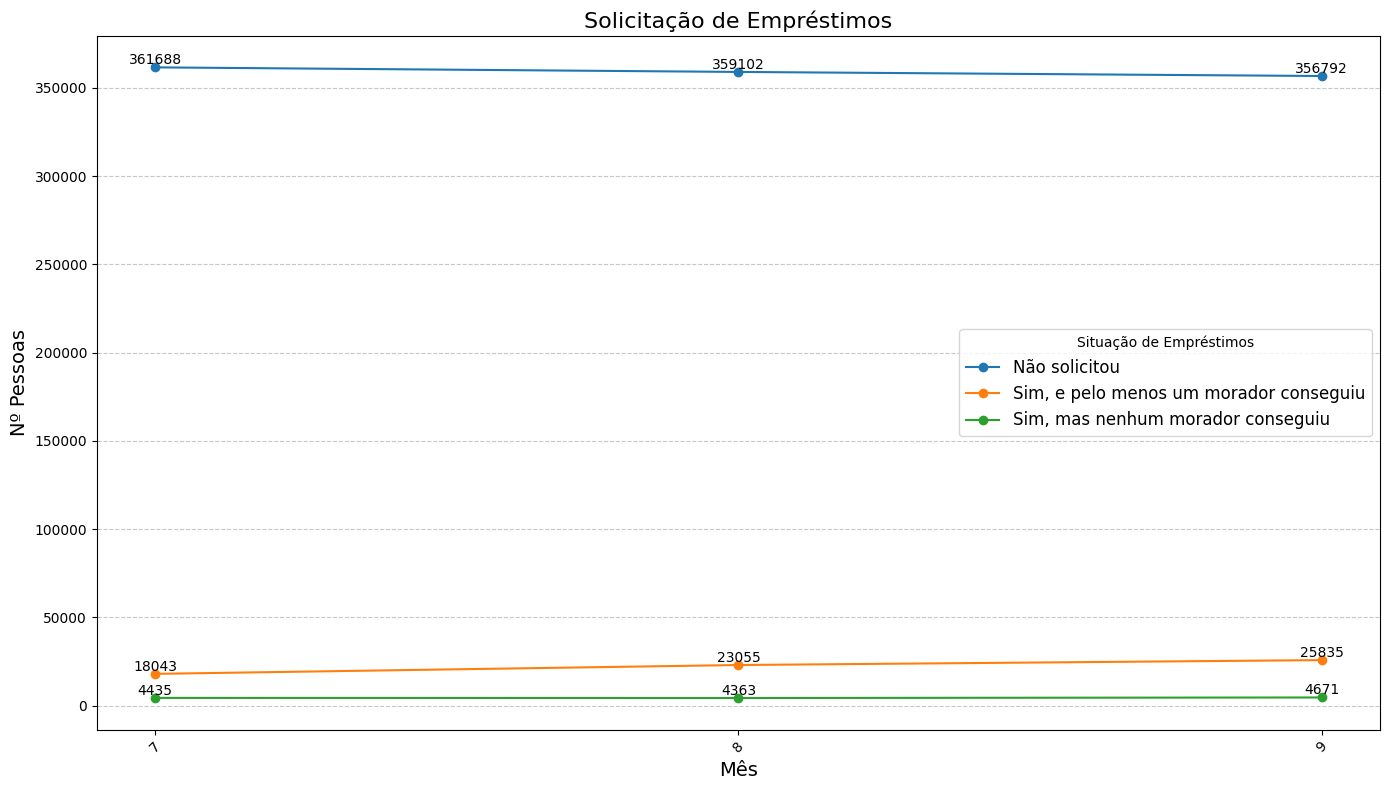

In [23]:
# Mapeando a coluna 'solicitou_emprestimo' para categorias legíveis
df['categoria_solicitou_emprestimo'] = df['solicitou_emprestimo'].map({
    1: 'Sim, e pelo menos um morador conseguiu',
    2: 'Sim, mas nenhum morador conseguiu',
    3: 'Não solicitou'
}).fillna('Não Aplicável')

# Contando as ocorrências de cada categoria por mês
contagem_solicitou_emprestimo = df.groupby(['mes', 'categoria_solicitou_emprestimo']).size().unstack(fill_value=0)

# Criando o gráfico
fig, ax = plt.subplots(figsize=(14, 8))

for categoria in contagem_solicitou_emprestimo.columns:
    valores = contagem_solicitou_emprestimo[categoria]
    ax.plot(contagem_solicitou_emprestimo.index, valores, label=categoria, marker='o' )
    # Adicionando rótulos de dados
    for x, y in zip(contagem_solicitou_emprestimo.index, valores):
        ax.text(x, y + 0.5, str(y), ha='center', va='bottom', fontsize=10)

# Adicionando título e rótulos
ax.set_title('Solicitação de Empréstimos', fontsize=16)
ax.set_xlabel('Mês', fontsize=14)
ax.set_ylabel('Nº Pessoas', fontsize=14)
ax.legend(title='Situação de Empréstimos', fontsize=12)

# Ajustando o layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(contagem_solicitou_emprestimo.index, rotation=45)
plt.tight_layout()
plt.show()
